In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/Credit Card Fraud Dataset.csv")


In [ ]:
data.head()


,,,,,,,,,,,,,,GephiData
idItem,date,client,usercategory,profile,location,typeTrans,amount,balance,clientB,profileB,locationB,balanceB,Class,suspicious
1,2014-01-07 00:40:10,C813207794,4,1,6,5,31404.69,31459.54,C315780191,1,0,15911.47,0,0
5,2013-09-17 04:08:16,C1865053469,4,1,0,3,26914.05,34871.24,C406562340,1,6,7697.58,0,0
7,2014-01-24 15:15:29,C657736953,1,1,5,4,13247.80,27865.02,C99994286,2,5,23507.29,0,0
9,2013-12-01 19:21:48,C972370591,3,2,0,5,118829.28,73552.01,C956030107,1,0,584.73,0,0


In [ ]:
data.Class.unique()

array([0, 1])

In [ ]:
data=data.dropna()

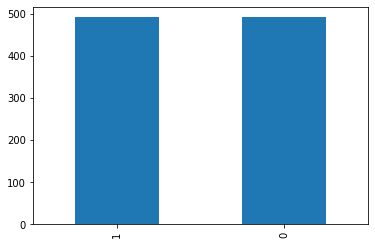

In [ ]:
suspicious_count = len(data[data['Class'] == 1])
non_suspicious_count = len(data[data['Class'] == 0])

sampled_non_suspicious = data[data['Class'] == 0].sample(n=suspicious_count)
suspicious = data[data['Class'] == 1]

sampled_non_suspicious.reset_index(drop=True, inplace=True)
suspicious.reset_index(drop=True, inplace=True)

balanced_data = pd.concat([sampled_non_suspicious, suspicious]).reset_index(drop=True);

balanced_data['Class'].value_counts().plot(kind='bar')

In [ ]:
y = balanced_data.Class
X = balanced_data.drop(columns=["Class"])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore")
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)


(787, 30)
(197, 30)
(787,)
(197, 30)


In [ ]:
param_grid=[{"C":np.logspace(-4,4,15)},
            {"penalty": ["l1","l2"]},
            {"solver": ["lbfgs","liblinear","adam"]},
            {"max_iter":[10000]}]
lr=LogisticRegression()



In [ ]:
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=10, scoring='recall', refit=True) # you can change scoring function that will impact the estimator #### https://scikit-learn.org/stable/modules/model_evaluation.html
grid = grid.fit(X_train, y_train)
print('Best_estimator_: {}\nWeights: {}, Intercept: {}\nBest params: {}\nScorer: {}'.format(grid.best_estimator_, grid.best_estimator_.coef_, grid.best_estimator_.intercept_,grid.best_params_, grid.scorer_))
print('Available parameters for the estimator (fine-tuning): ',lr.get_params().keys())

Best_estimator_: LogisticRegression(C=2682.695795279722)
Weights: [[ -0.92468568   4.95550862  -2.26624284  -0.25104507   3.64670311
    1.67818066  -0.57773309  -0.22113317  -5.59815094  -2.00657238
   -8.68041182   2.21079657  -8.85131546  -0.47742052 -10.8888218
   -0.1569749   -5.14277678 -14.06984672  -0.71446342   0.68600869
   -0.65516571   0.86754758   1.06851214  -0.35264265   0.13190246
   -0.67855931  -0.1856075    0.26903594   0.74629952   0.25656918]], Intercept: [28.60523689]
Best params: {'C': 2682.695795279722}
Scorer: make_scorer(recall_score, average=binary)
Available parameters for the estimator (fine-tuning):  dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [ ]:
y_train_predict = grid.predict(X_train)
print("Training SET")
print("--------------------------------------")
print('Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}'.format(accuracy_score(y_train, y_train_predict), precision_score(y_train, y_train_predict), recall_score(y_train, y_train_predict), f1_score(y_train, y_train_predict)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_train, y_train_predict)))

# model evaluation for testing set
y_test_predict = grid.predict(X_test)

print("\nTesting SET")
print("--------------------------------------")
print('Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}'.format(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict), f1_score(y_test, y_test_predict)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_test_predict)))

Training SET
--------------------------------------
Accuracy: 0.949, Precision: 0.976, Recall: 0.921, F1 Score: 0.948
Confusion Matrix:
 [[384   9]
 [ 31 363]]

Testing SET
--------------------------------------
Accuracy: 0.954, Precision: 0.959, Recall: 0.949, F1 Score: 0.954
Confusion Matrix:
 [[95  4]
 [ 5 93]]


Text(0.5, 1.0, 'Accuracy Score: <function accuracy at 0x7efc5b47ef80>')

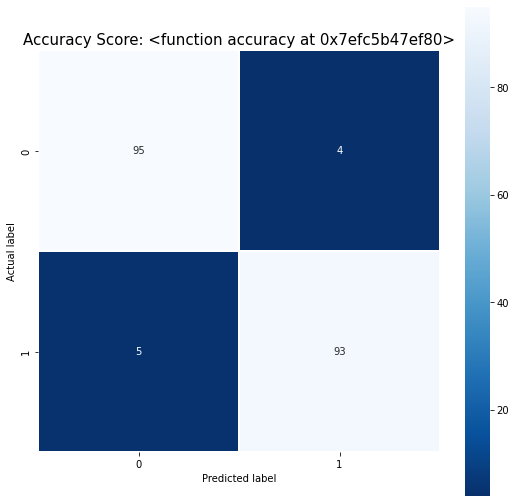

In [ ]:
from sklearn import metrics
import seaborn as sns
def accuracy(y, y_hat):
  return np.mean(y == y_hat)
cm = metrics.confusion_matrix(y_test, y_test_predict)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 

In [ ]:
#predict probabilities' 

lr_probs_train=grid.predict_proba(X_train)
lr_probs_test=grid.predict_proba(X_test)

#keep probabilities for the positive outcome only 
lr_probs_train=lr_probs_train[:,1]
lr_probs_test=lr_probs_test[:,1]
print('ROC AUC (Training)={:.3f}'.format(roc_auc_score(y_train, lr_probs_train)))
print('ROC AUC (Testing)={:.3f}'.format(roc_auc_score(y_test, lr_probs_test)))

ROC AUC (Training)=0.986
ROC AUC (Testing)=0.983


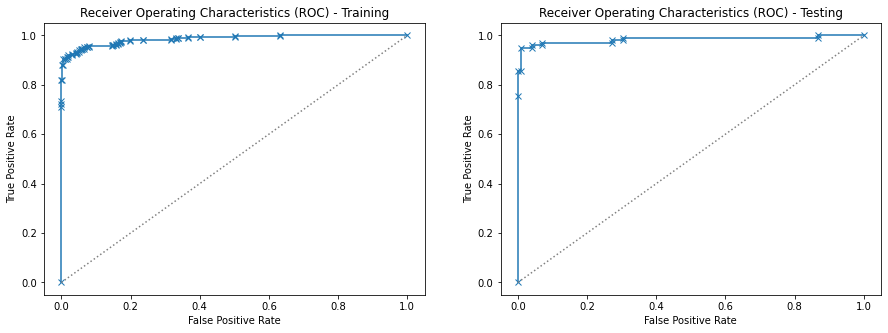

In [ ]:
lr_fpr_train, lr_tpr_train,_ = roc_curve(y_train, lr_probs_train)
lr_fpr_test, lr_tpr_test,_ = roc_curve(y_test, lr_probs_test)

# plot the roc curve for the training set
_ = plt.figure(figsize=(15, 5))
ax1 =plt.subplot(121)
_ = ax1.plot(lr_fpr_train, lr_tpr_train, marker='x')
_ = ax1.plot([0,1], [0, 1], 'gray', linestyle=':', marker='')
_ = ax1.set_title('Receiver Operating Characteristics (ROC) - Training')
_ = ax1.set_xlabel('False Positive Rate')
_ = ax1.set_ylabel('True Positive Rate')

# plot the roc curve for the testing set
ax2 = plt.subplot(122)
_ = ax2.plot(lr_fpr_test, lr_tpr_test, marker='x')
_ = ax2.plot([0,1], [0, 1], 'gray', linestyle=':', marker='')
_ = ax2.set_title('Receiver Operating Characteristics (ROC) - Testing')
_ = ax2.set_xlabel('False Positive Rate')
_ = ax2.set_ylabel('True Positive Rate')

In [ ]:
fraud = {1: 'Yes', 0:'No'} # just to revert back y_test's 0,1 numeric to YES/NO categorical values for display
pb_df = pd.DataFrame({'fraud':[fraud[numeric_cat] for numeric_cat in y_test[0:]], 'PREDICTED PROBABILITY OF BEING FRAUD':lr_probs_test[0:]}, columns=['fraud', 'PREDICTED PROBABILITY OF BEING FRAUD'])
pb_df.iloc[10:20].head(10)


,fraud,PREDICTED PROBABILITY OF BEING FRAUD
10,Yes,1.000000e+00
11,No,7.184852e-02
12,No,2.597424e-01
13,Yes,1.000000e+00
14,Yes,9.828063e-01
15,Yes,8.267523e-02
16,No,6.119515e-08
17,No,6.203350e-03
18,Yes,1.000000e+00
19,Yes,1.000000e+00


In [ ]:
# compute: net input (z): refer to Slide 4 of lecture notes [it is just the weighted sum, z = \sum_{j=1}^m w_j.x_j + w_0]
z = np.dot(X_test[10:11].tolist()[0], grid.best_estimator_.coef_[0])+grid.best_estimator_.intercept_[0]

# compute: sigma(z): the probability / activation function output - again refer to Slide 4 of lecture notes....
sigma_z = 1 / (1+ np.exp(-z))
print("For record X_test[10], our manually computed probability: {}, sklearn's returned probability: {}".format(sigma_z, grid.predict_proba(X_test[10:11])[:,1][0]))
print('The two false positives are below: ')
pb_df[(pb_df['fraud'] == 'no') & (pb_df['PREDICTED PROBABILITY OF BEING FRAUD'] >= 0.5)]

For record X_test[10], our manually computed probability: 1.0, sklearn's returned probability: 1.0
The two false positives are below: 


,fraud,PREDICTED PROBABILITY OF BEING FRAUD


In [ ]:
print(pb_df)

    fraud  PREDICTED PROBABILITY OF BEING FRAUD
0     Yes                              1.000000
1     Yes                              1.000000
2      No                              0.121793
3     Yes                              1.000000
4      No                              0.039950
..    ...                                   ...
192    No                              0.000168
193   Yes                              1.000000
194    No                              0.033968
195   Yes                              1.000000
196    No                              0.100491

[197 rows x 2 columns]


In [ ]:
y_train_predict[0:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
y_train[0:10]

33     0
281    0
648    1
802    1
513    1
907    1
423    0
282    0
131    0
701    1
Name: Class, dtype: int64